In [2]:
import pandas as pd
import torch
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [3]:
df = pd.read_csv('KOSPI.csv')
df.head(10)

,Date,Close,Open,High,Low,Volume,Volatility
0,2000-05-03,753,751,756,743,179.78M,0.02%
1,2000-05-04,751,753,761,745,190.23M,-0.20%
2,2000-05-08,770,759,778,759,195.51M,2.52%
3,2000-05-09,761,768,772,759,181.01M,-1.22%
4,2000-05-10,760,757,765,754,193.57M,-0.18%
5,2000-05-12,740,763,763,737,189.06M,-2.53%
6,2000-05-15,729,737,740,720,193.28M,-1.57%
7,2000-05-16,747,729,747,724,172.35M,2.48%
8,2000-05-17,727,753,769,727,219.01M,-2.62%
9,2000-05-18,713,706,719,699,201.44M,-1.96%


In [5]:
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})[['ds', 'y']]
df.head(10)

,ds,y
0,2000-05-03,753
1,2000-05-04,751
2,2000-05-08,770
3,2000-05-09,761
4,2000-05-10,760
5,2000-05-12,740
6,2000-05-15,729
7,2000-05-16,747
8,2000-05-17,727
9,2000-05-18,713


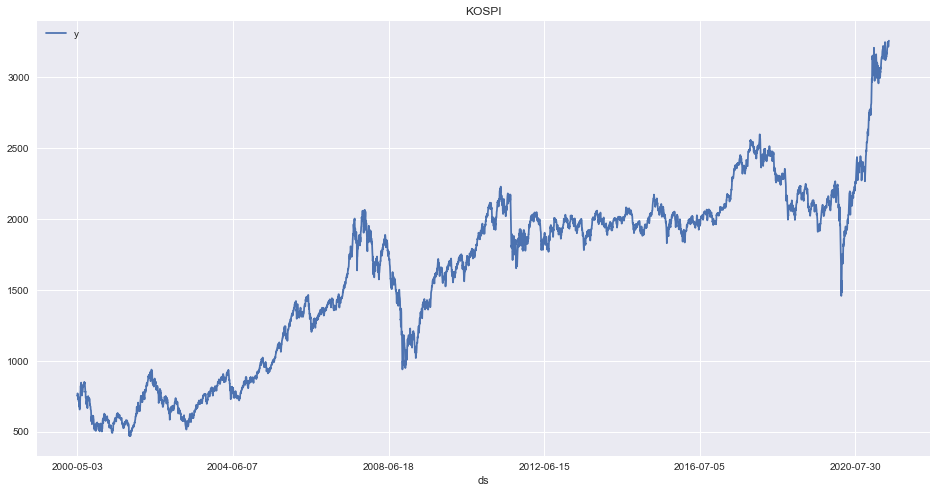

In [6]:
df.plot(x='ds', y='y', title='KOSPI');

In [7]:
test_length = 365
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

In [8]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit(df_train, freq="D")
future_df = nprophet_model.make_future_dataframe(df_train, 
                                                 periods = test_length, 
                                                 n_historic_predictions=len(df_train))
preds_df_2 = nprophet_model.predict(future_df)

C:\Users\rodls\anaconda3\envs\face\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 13


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[13/13]: 100%|█| 13/13 [00:04<00:00,  3.19it/s, SmoothL1Loss=0.0033, MAE=1


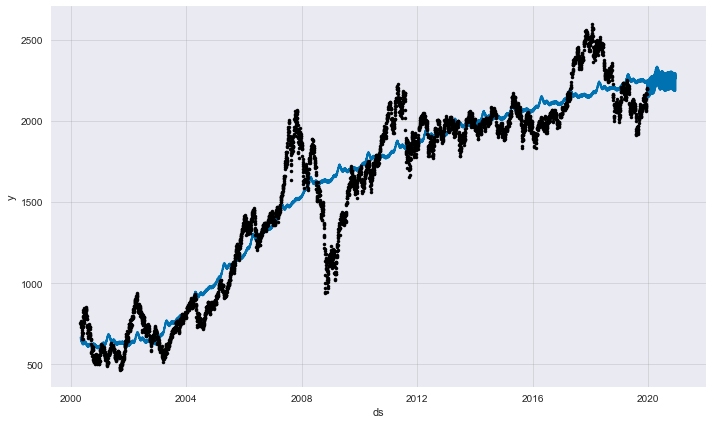

In [9]:
nprophet_model.plot(preds_df_2);

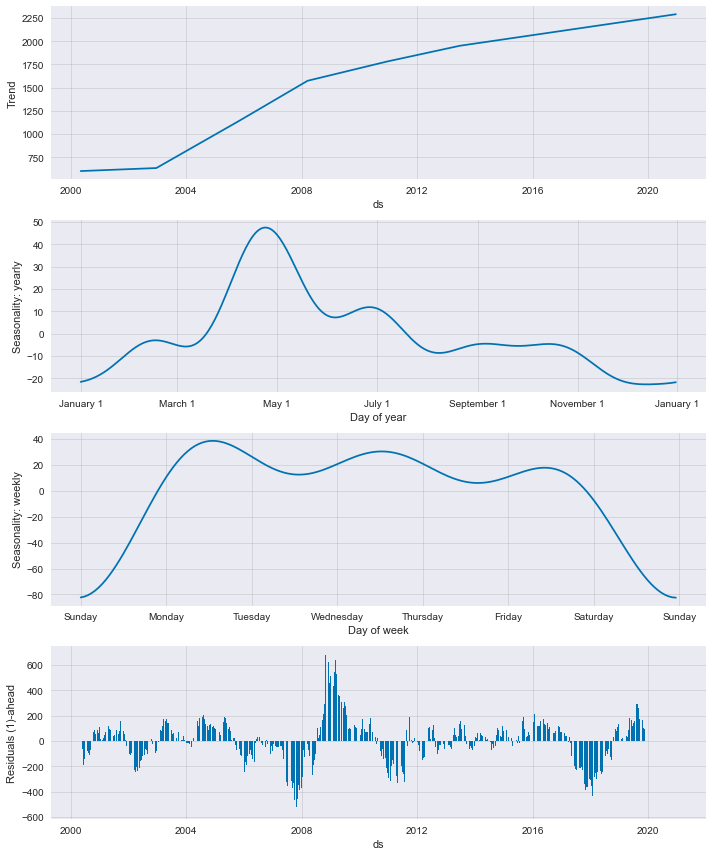

In [10]:
nprophet_model.plot_components(preds_df_2, residuals=True);

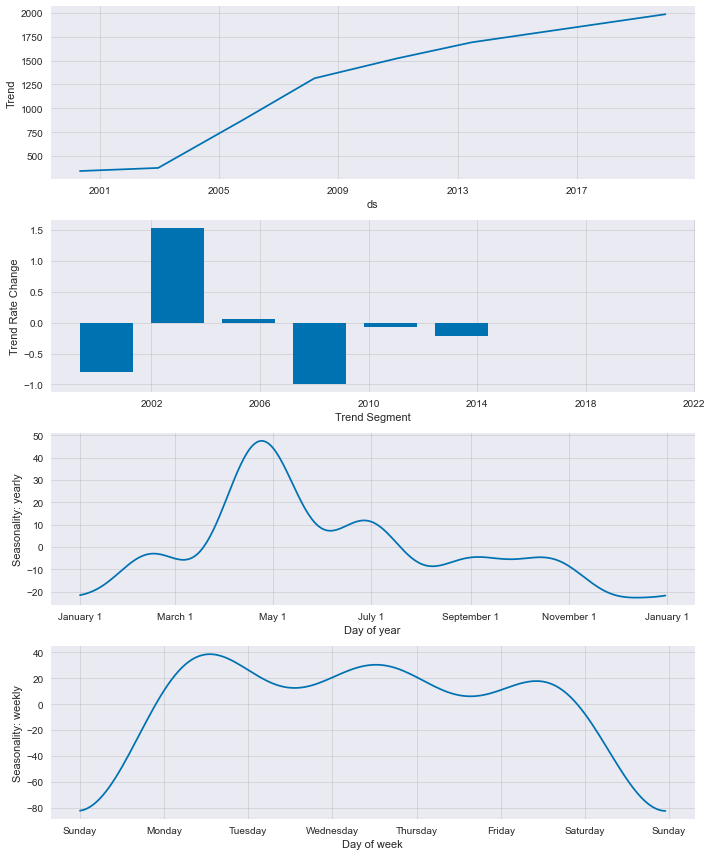

In [11]:
nprophet_model.plot_parameters();

In [22]:
import pickle
pkl_path = "Prophet.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(nprophet_model, f)

# save the dataframe
df.to_pickle("df.pkl")
print("*** Data Saved ***")

*** Data Saved ***
